# Réseau d'accès radio TP
Lucas Hocquette

### Exercice 2 Contrôle de puissance dans un système CDMA : Capacité et solution itérative

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

$$ 
F = \begin{pmatrix} 
        0, \frac{g_2}{R_1g_1}, \cdots, \frac{g_k}{R_1g_1} \\
        \frac{g_1}{R_2g_2}, 0, \ddots, \vdots \\
        \vdots, \ddots, \ddots, \vdots \\
        \frac{g_1}{R_kg_k}, \cdots, \cdots, 0
    \end{pmatrix}       
$$

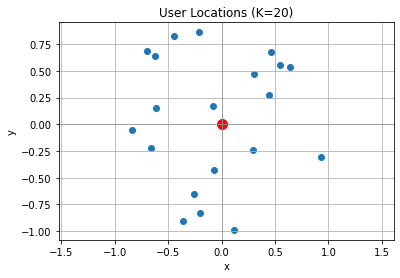

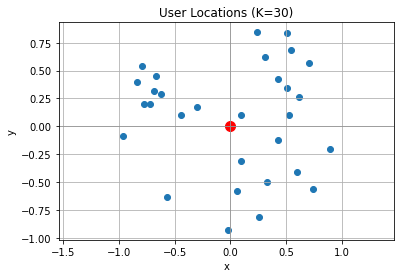

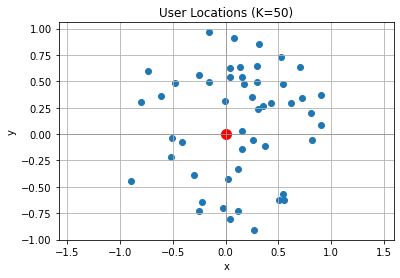

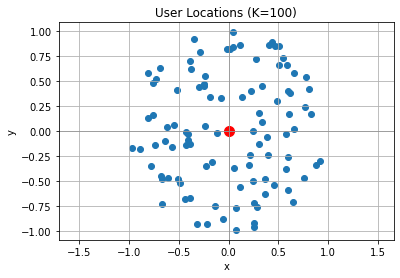

In [2]:
# 1.a

def sample_users(K,R):
    v = np.random.uniform(low=0,high=R**2,size=K)
    theta = np.random.uniform(low=0,high=2*np.pi,size=K)
    r = np.sqrt(v)
    x,y = r*np.cos(theta), r*np.sin(theta)
    return x,y

for K in [20,30,50,100]:
    # Example usage
    R = 1
    x, y = sample_users(K, R)

    plt.scatter(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"User Locations (K={K})")
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.axis('equal')
    plt.gca().set_aspect('equal')
    plt.grid(True)
    plt.scatter(0, 0, color='red', s=100)
    plt.show()

In [3]:
# 1.b
# K = np.array([20, 30, 50, 100],dtype=np.int32)
K = np.array(range(10,100,2), dtype=np.int32)
R = 1
r1,r2 = 15*1e3,32*1e3
W = 3.84*10**6
theta = 0.4
gamma1, gamma2  = 10**(5/10), 10**(7/10)
Rho = np.array([])

def generate_F(k,R,r1,r2,gamma1,gamma2,W,theta):
    x,y = sample_users(k,R)
    r = np.concatenate((r1*np.ones(k//2),r2*np.ones(k//2)))
    gamma = np.concatenate((gamma1*np.ones(k//2),gamma2*np.ones(k//2)))
    lamda = 0.5
    # h = np.random.exponential(1/lamda,k)
    h = np.ones(k)
    d = np.sqrt(x**2+y**2)
    L = -128.1 - 37.6*np.log10(d)
    l = 10**(L/10)
    g = l*h
    G1,G2 = np.meshgrid(gamma*r*g,g)
    F = (theta/W)*G1 / G2
    F[np.eye(k,dtype=np.bool)] = 0
    return F, r, gamma, g

for k in K:
    F,_,_,_ = generate_F(k,R,r1,r2,gamma1,gamma2,W,theta)
    rho = np.max(np.abs(np.linalg.eigvals(F)))
    Rho = np.append(Rho,rho)

Kmax = np.max(K[Rho<1])
print(Kmax)

92


C:\Users\lucas\AppData\Local\Temp/ipykernel_16220/1958558858.py:24: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F[np.eye(k,dtype=np.bool)] = 0


In [5]:

#1.c
k = Kmax

x,y = sample_users(k,R)
r = np.concatenate((r1*np.ones(k//2),r2*np.ones(k//2)))
gamma = np.concatenate((gamma1*np.ones(k//2),gamma2*np.ones(k//2)))
lamda = 0.5
h = np.ones(k)
d = np.sqrt(x**2+y**2)
L = -128.1 - 37.6*np.log10(d)
l = 10**(L/10)
g = l*h
G1,G2 = np.meshgrid(gamma*r*g,g)
F = (theta/W)*G1 / G2
F[np.eye(k,dtype=np.bool)] = 0

sigma2 = 10**(-104/10)/1000
b = sigma2*(1/(3.84*10**6))*r*gamma/g
P =  np.linalg.inv(np.eye(k) - F)@b

print(10*np.log10(P*1000)) # display the power allocation in dBm

def SINR(W,R,P,G,theta,sigma2):
    alpha = W/R
    pg = P*G
    pg1,_ = np.meshgrid(pg,pg)
    pg1[np.eye(len(pg),dtype=np.bool)] = 0
    sm = np.sum(pg1,axis=1)
    return alpha*pg/(theta*sm+sigma2)

[ 26.69058488  24.86231871   9.3945588  -11.06649836  26.92025686
  21.60149469  23.76415427  19.99795328  25.13059161  18.20544692
  25.76026769  17.32841804  25.68690362  24.83235049  23.51903621
  20.29880849  14.34537024  22.72164055  17.20361018  20.37783623
  21.58398549  23.71703394  26.07393021  20.77681644  18.97283574
  18.93758224  22.08068385  25.13937302  25.35251288  19.44328323
  20.04768571  24.3643721   23.37384172  -4.59162325  25.44830098
  21.41012471  22.15822004  23.57053182  25.54252939  10.29598047
  18.4829011   15.41026317   9.94450532  14.9376293   20.72475844
  26.44532547  18.03434977  21.15088691  22.29695399  25.3068662
   8.72994026  22.16986798  24.38322733  25.4462998   22.47619529
  15.00887762  23.14394781  26.60600206  24.24909718  15.39015577
  25.37787876  24.76096658  26.04437829   7.51879626  26.20044178
  23.25164484  22.88949838  20.73763228  18.52723508  21.93942672
  19.07719867  17.43706136  22.80099842  26.07245289   7.90140396
  24.086275

C:\Users\lucas\AppData\Local\Temp/ipykernel_16220/158348589.py:15: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  F[np.eye(k,dtype=np.bool)] = 0


k=10, num_iteration=3
k=12, num_iteration=3
k=14, num_iteration=1
k=16, num_iteration=7
k=18, num_iteration=3
k=20, num_iteration=3
k=22, num_iteration=4
k=24, num_iteration=5
k=26, num_iteration=3
k=28, num_iteration=5
k=30, num_iteration=4
k=32, num_iteration=5
k=34, num_iteration=8
k=36, num_iteration=4
k=38, num_iteration=4
k=40, num_iteration=11
k=42, num_iteration=6
k=44, num_iteration=11
k=46, num_iteration=6
k=48, num_iteration=8
k=50, num_iteration=14
k=52, num_iteration=12
k=54, num_iteration=16
k=56, num_iteration=12
k=58, num_iteration=8
k=60, num_iteration=9
k=62, num_iteration=8
k=64, num_iteration=11
k=66, num_iteration=32
k=68, num_iteration=12
k=70, num_iteration=26
k=72, num_iteration=15
k=74, num_iteration=17
k=76, num_iteration=22
k=78, num_iteration=22
k=80, num_iteration=50
k=82, num_iteration=57
k=84, num_iteration=19
k=86, num_iteration=21
k=88, num_iteration=10
k=90, num_iteration=133


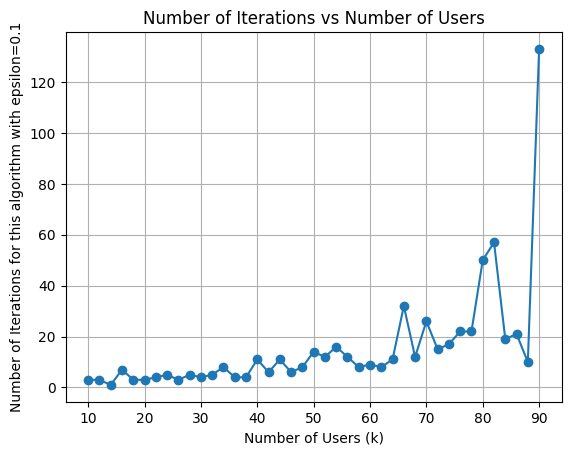

In [ ]:
#1.d
K_list = np.array(range(10,Kmax,2), dtype=np.uint32)
epsilon = 0.1
iteration_list = np.zeros(len(K_list))

for idx in range(len(K_list)):
    k = K_list[idx]
    p = np.ones(k)
    new_p = np.ones(k)*0.1
    num_iteration = 0
    _, r, gamma, g = generate_F(k,R,r1,r2,gamma1,gamma2,W,theta)
    while not np.all(np.abs(p - new_p) < epsilon):
        p = new_p
        pg = p*g
        pg1,_ = np.meshgrid(pg,pg)
        pg1[np.eye(len(pg),dtype=np.bool)] = 0
        sm = np.sum(pg1,axis=1)
        new_p = (r*gamma*(theta*sm + sigma2))/(W*g)
        num_iteration += 1
    iteration_list[idx] = num_iteration
    print(f"k={k}, num_iteration={num_iteration}")

plt.plot(K_list, iteration_list, marker='o')
plt.xlabel('Number of Users (k)')
plt.ylabel(f'Number of Iterations with epsilon={epsilon}')
plt.title('Number of Iterations vs Number of Users')
plt.grid(True)
plt.show()
    

In [33]:
# 1.e

def iterativeE(gamma,beta,tol,seed):
    p=seed.copy()
    p_old = np.inf*np.ones_like(p)
    iter = 0
    while np.sum(abs(p-p_old))>=tol:
        p_old = p.copy()
        sinr = SINR(W,r,p,g,theta,sigma2)
        p = (1-beta)*p + beta*gamma/sinr*p
        iter +=1
    return p, iter

Beta = [0.1,0.3,0.5,0.8]
Niter = np.zeros_like(Beta)
_, r, gamma, g = generate_F(Kmax,R,r1,r2,gamma1,gamma2,W,theta)

seed = np.ones(Kmax)
for b in range(len(Beta)):
    p,iter = iterativeE(gamma,Beta[b],1e-3,seed)
    Niter[b] = iter

print(Niter)

[6195. 2263. 1412.  912.]


In [32]:
# 1.f

def iterativeF(gamma,alpha,tol,seed,maxIter):
    p = seed.copy()
    p_old = np.inf*np.ones_like(p)
    iter = 0
    while (np.sum(abs(p-p_old))>=tol) & (iter<maxIter):
        p_old = p.copy()
        sinr = SINR(W,r,p,g,theta,sigma2)
        p[sinr<gamma] = alpha*p_old[sinr<gamma]
        p[sinr>gamma] = p_old[sinr>gamma]/alpha
        iter +=1
    return p, iter

Alpha = 10**(np.linspace(0.25,1.5,7)/10)
Niter = np.zeros_like(Alpha)
_, r, gamma, g = generate_F(Kmax,R,r1,r2,gamma1,gamma2,W,theta)

seed = np.ones(Kmax)
for a in range(len(Alpha)):
    p,iter = iterativeF(gamma,Alpha[a],1e-3,seed,5e3)
    Niter[a] = iter

print(Niter)

[1. 1. 1. 1. 1. 1. 1.]


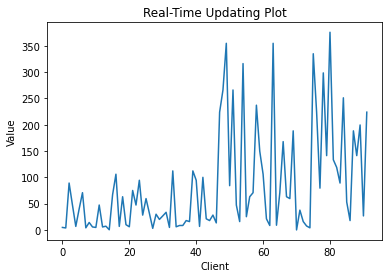

0.028963098084837702
[111. 111. 111.]


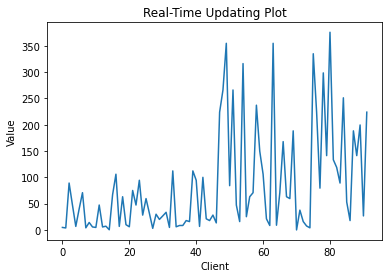

In [6]:
# 1.g

plt.ion()  # Turn on interactive mode

# Create a figure and axis for the plot
fig, ax = plt.subplots()
ax.set_title('Real-Time Updating Plot')
ax.set_xlabel('Client')
ax.set_ylabel('Value')

# Initialize an empty list for the data
p_plot = []

# Plot the initial empty data
line, = ax.plot(p_plot)

# Display the plot
display(fig)

def update_plot(p):
    clear_output(wait=True)
    line.set_ydata(p)
    line.set_xdata(range(len(p)))
    ax.relim()
    ax.autoscale_view()
    display(fig)

def iterativeG(gamma,alpha,tol,maxIter):
    p = np.ones(Kmax)
    p_old = np.inf*np.ones_like(p)
    iter = 0
    while (np.sum(abs(p-p_old))/Kmax>=tol) & (iter<maxIter):
        p_old = np.copy(p)
        sinr = SINR(W,r,p,g,theta,sigma2)
        p[sinr > alpha*gamma*p_old] = p_old[sinr > alpha*gamma*p_old]/alpha
        p[sinr < gamma*alpha**(-1)] = p_old[sinr < gamma*alpha**(-1)]*alpha
        iter += 1
        if iter % 10 == 0:
            update_plot(p)
            print(np.sum(abs(p-p_old))/Kmax)
    return p, iter

Alpha = 10**(np.linspace(0.25,1.5,7)/10)
Alpha = [10**(0.25/10), 10**(0.25/10), 10**(0.25/10)]
Niter = np.zeros_like(Alpha)
_, r, gamma, g = generate_F(Kmax,R,r1,r2,gamma1,gamma2,W,theta)
epsilon = 5e-3

for a in range(len(Alpha)):
    p_alpha,iter = iterativeG(gamma,Alpha[a],epsilon,5e3)
    Niter[a] = iter

print(Niter)